#                                               Happy Joe App
#                                       Vendor List-Jan-21 Analysis

In [1]:
# import necessary packages and tools
import numpy as np
import pandas as pd
import missingno as msno # to illustrate missing values (msno.bar(dataframe) or msno.heatmap(dataframe))
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

import warnings  # to suppress warnings
warnings.filterwarnings("ignore")

# set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_excel('Copy of Vendor List-Jan-21.xlsx', sheet_name=1)
df

,,Unnamed: 1,Unnamed: 2,Unnamed: 3,"*quick service, instagrammable, health conscious, young brand, not national chain",Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Today,2021-02-15 00:00:00,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,,NaN,NaN,NaN,*easiest to sell to - easiest penetration point,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN,,,,,,,,,,NaN
1,No.,Location,BETA AIM,Focus Area/Brand?,Initial Target Market,Vendor,Cuisine,Email,E-book sent?,Number,x,NaN,NaN,Status,Weeks since contact,Comments,Called?,Time called,Emailed?,Contacter,Call notes,Strategy,Length of call,Meeting set up?,NaN
2,1,Balham,No,Yes,Yes,Little Brother Marcus,Brunch,balham@brothermarcus.co.uk,Yes,020 3674 2141,2020-10-02 00:00:00,PM,1-5 min,Not interested - email me docs,-19.428571,GM is passing on my details!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Balham,No,Yes,Yes,Milk,Brunch,lauren@milk.london,Yes,020 8772 9085,2020-06-09 00:00:00,AM,1-5 min,Not interested - dont call me,-35.857143,"""built a loyal following without technology & ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,Balham,No,Yes,No,Grain de Cafe,Coffee,NaN,No,020 3441 2975,2021-02-04 00:00:00,PM,0 min,Call back when lockdown is over,-1.571429,permantely closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Look at our data

- How many rows are in the dataset?
- How many columns are in this dataset?
- What data types are the columns?
- Is the data complete? Are there nulls? Do we have to infer values?
- What is the definition of these columns?
- What are some other caveats to the data?


In [3]:
headers_1 = list(df.iloc[1,:])
print(headers_1,len(headers_1))

['No.', 'Location', 'BETA AIM', 'Focus Area/Brand?', 'Initial Target Market', 'Vendor', 'Cuisine', 'Email', 'E-book sent?', 'Number', 'x', nan, nan, ' Status', 'Weeks since contact ', 'Comments', 'Called?', 'Time called', 'Emailed?', 'Contacter', 'Call notes', 'Strategy', 'Length of call', 'Meeting set up?', nan] 25


In [4]:
# after reading of the data, we figured out the headers were initialised on the third row of the excel sheet.
# in order to use the headers as our dataframe columns we do some crud works
df.columns=headers_1

In [5]:
df = df.loc[2: df.Vendor.notna()[::-1].idxmax() ,: ]

In [6]:
df.columns.values[[10, 11,12]] = ['date-called', 'am-pm','duration-call']

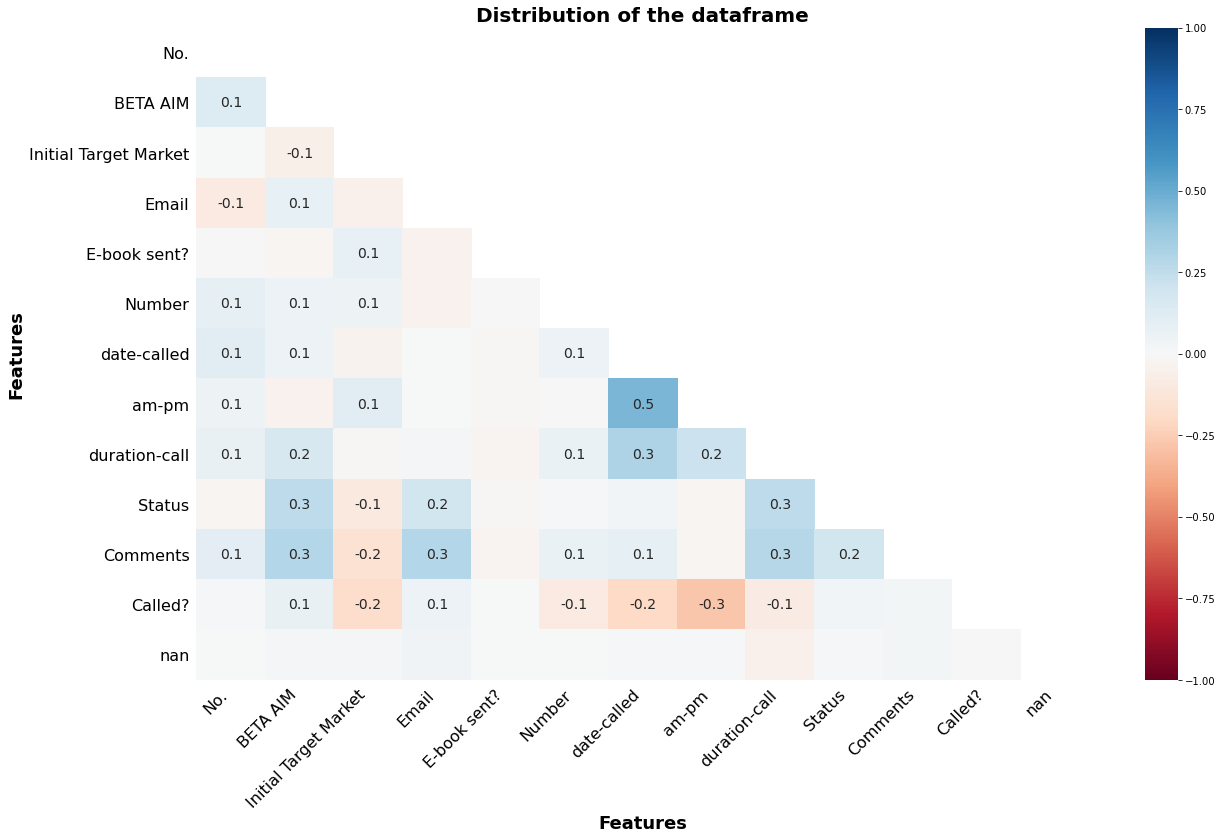

In [7]:
msno.heatmap(df)
plt.title('Distribution of the dataframe', fontsize=20, fontweight='bold')
plt.ylabel('Features', fontsize=18, fontweight='bold')
plt.xlabel('Features', fontsize=18, fontweight='bold')
plt.show()

In [8]:
# our dataframe has 25 columns, however no data stored on after 16th columns
df.drop(df.iloc[:, 16:], inplace = True, axis = 1) 

In [9]:
# our index aligns with No. column, it means we can use it as our index and we rarefy one column our dataframe
df.index = df['No.'].astype(np.float).astype("Int64")

In [10]:
df.index = pd.RangeIndex(len(df.index))
df.head()

,No.,Location,BETA AIM,Focus Area/Brand?,Initial Target Market,Vendor,Cuisine,Email,E-book sent?,Number,date-called,am-pm,duration-call,Status,Weeks since contact,Comments
0,1,Balham,No,Yes,Yes,Little Brother Marcus,Brunch,balham@brothermarcus.co.uk,Yes,020 3674 2141,2020-10-02 00:00:00,PM,1-5 min,Not interested - email me docs,-19.428571,GM is passing on my details!
1,2,Balham,No,Yes,Yes,Milk,Brunch,lauren@milk.london,Yes,020 8772 9085,2020-06-09 00:00:00,AM,1-5 min,Not interested - dont call me,-35.857143,"""built a loyal following without technology & ..."
2,3,Balham,No,Yes,No,Grain de Cafe,Coffee,NaN,No,020 3441 2975,2021-02-04 00:00:00,PM,0 min,Call back when lockdown is over,-1.571429,permantely closed
3,4,Balham,No,Yes,Yes,Heart of Balham,Brunch,hob.balham@outlook.com,No,020 3561 1164,2020-10-02 00:00:00,PM,1-5 min,Not interested - email me docs,-19.428571,manager not in. in & out
4,5,Balham,No,Yes,No,Pasha Mangal,Turkish,skilic338@gmail.com,No,020 8675 6556,2020-09-09 00:00:00,PM,<1min,Interested - email me docs,-22.714286,call back 10am tomorrow morning


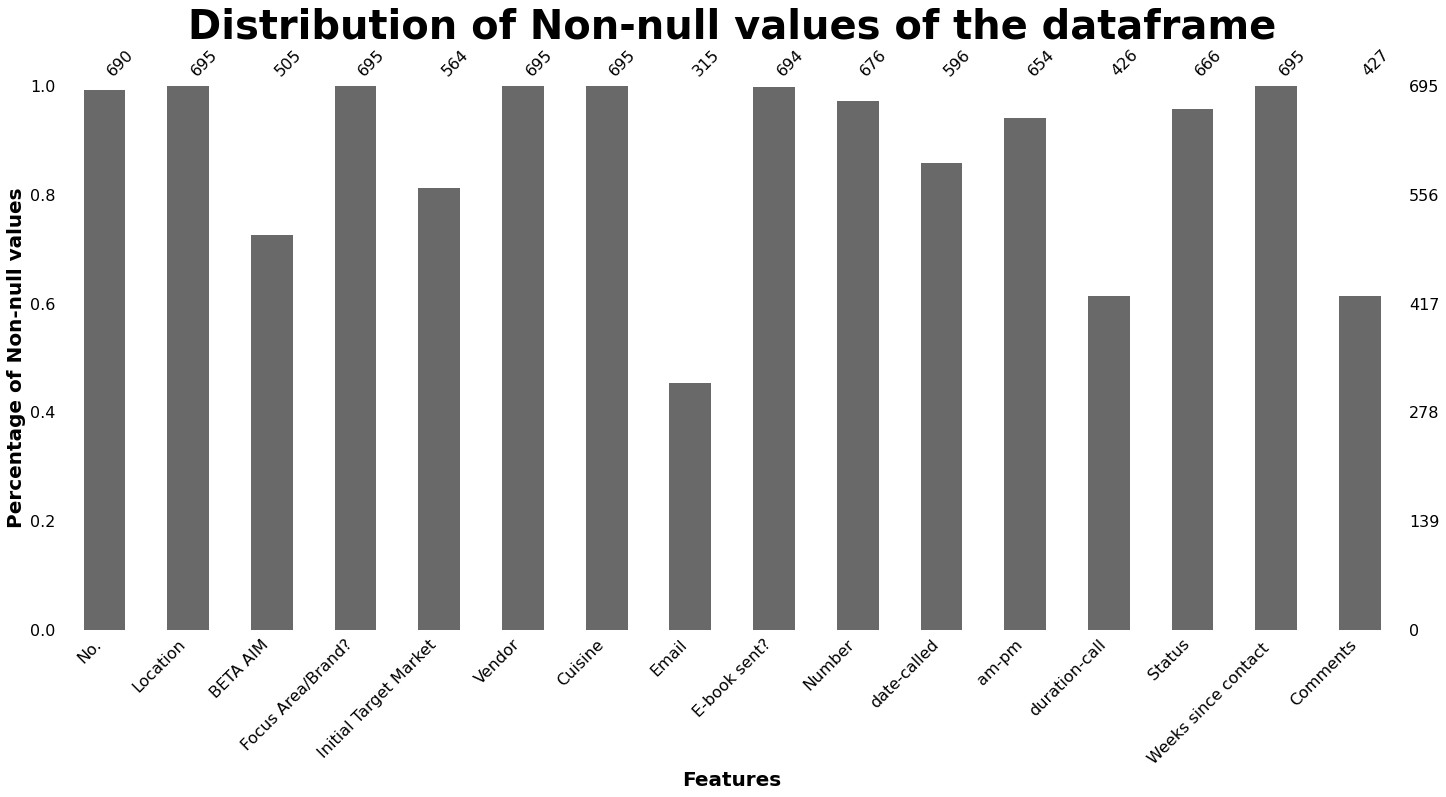

In [11]:
# an illustration of non-null values of the dataframe
plt.title('Distribution of Non-null values of the dataframe', fontsize=40, fontweight='bold')
plt.ylabel('Percentage of Non-null values', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=20, fontweight='bold')
msno.bar(df)
plt.show()

## What are some questions we can answer with this data?

Understand the limitations of our data and what potential questions can be answered by data is important.  These questions can reduce, expand, or modify the scope of our project.

**Data.** We have vendor list of possible Happy Joe App customers/associates for given dates with some of their representives contact details for example their email address or the time and duration of the phone calls


**Questions we could try to answer. **

1- What are the areas where we are likely to have a deal with the vendors?
2- What are the areas where we are unlikely to have a deal with the vendors?

3 - What are the Cuisines which we are likely to have a deal with the vendors?
4 - What are the Cuisines which we are likely to have a deal with the vendors?

5-Which areas should we give more priority to have deals with the vendors?
6-5-Which Cuisines should we give more priority to have deals with the vendors?

In [12]:
# it can be clearly seeable that the information on the columns
#of [No,Vendor,Email,Number,date-called,Weeks since contact, comments] 
# that include from head to toe unique values or have 
# unimportant data to use on any steps of the work.

df.drop(df.iloc[:, [0,5,7,9,10,14,15]], inplace = True, axis = 1) 

# or we can specify according to columns name

#df.drop('No.', axis=1, inplace=True)
#df.drop('Vendor', axis=1, inplace=True)
#df.drop('Email', axis=1, inplace=True)
#df.drop('Number', axis=1, inplace=True)
#df.drop('date-called', axis=1, inplace=True)
#df.drop('Weeks since contact', axis=1, inplace=True)
#df.drop('Comments', axis=1, inplace=True)

In [13]:
# a small correction of writing on the column name
df = df.rename(columns = {' Status':'Status'})
df

,Location,BETA AIM,Focus Area/Brand?,Initial Target Market,Cuisine,E-book sent?,am-pm,duration-call,Status
0,Balham,No,Yes,Yes,Brunch,Yes,PM,1-5 min,Not interested - email me docs
1,Balham,No,Yes,Yes,Brunch,Yes,AM,1-5 min,Not interested - dont call me
2,Balham,No,Yes,No,Coffee,No,PM,0 min,Call back when lockdown is over
3,Balham,No,Yes,Yes,Brunch,No,PM,1-5 min,Not interested - email me docs
4,Balham,No,Yes,No,Turkish,No,PM,<1min,Interested - email me docs
...,...,...,...,...,...,...,...,...,...
690,St James,Yes,Yes,Yes,Italian,No,PM,NaN,No answer - ring in 2 days
691,St James,Yes,Yes,No,Cafe,No,PM,<1min,No answer - ring in 2 days
692,St James,Yes,Yes,Yes,Coffee,No,PM,5-10 min,Not interested - dont call me
693,St James,No,Yes,Yes,Sandwiches,No,PM,0 min,No answer - ring in 2 days


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Location               695 non-null    object
 1   BETA AIM               505 non-null    object
 2   Focus Area/Brand?      695 non-null    object
 3   Initial Target Market  564 non-null    object
 4   Cuisine                695 non-null    object
 5   E-book sent?           694 non-null    object
 6   am-pm                  654 non-null    object
 7   duration-call          426 non-null    object
 8   Status                 666 non-null    object
dtypes: object(9)
memory usage: 49.0+ KB


##  Process the data

After this step we use a deep copy of our dataframe in order to avoid overwritting on our original dataframe
with trade off more usage of memory consumption



In [15]:
# to more confident play with data, we copy the df into two seperate dataframes 
df1=df.copy(deep=True) 
df2=df1.copy(deep=True)

In [16]:
# to have more gausisan-type disturbed data for easier and more accurate interpretation purposes
df2 = df2.apply(lambda x: x.fillna(x.mode()[0]),axis=0)

# df2['E-book sent?'].mode()[0] = 'No'
df2.at[694,'E-book sent?'] = 'No' # a particular null value that seldom gives errors/bugs/issues

# df2['duration-call'].mode()[0] = '0 min'
df2.at[500,'duration-call'] = '0 min' # a particular null value that seldom gives errors/bugs/issues

df2 = df2.apply(lambda x: x.fillna(x.mode()[0]),axis=0)

In [17]:
# some cleaning process on the column to have more gausisan-type disturbed data
df2["duration-call"].value_counts()

0 min       483
1-5 min     113
<1min        81
5-10 min     13
<10 min       5
Name: duration-call, dtype: int64

In [18]:
#df2["duration-call"].fillna("0 min", inplace = True) # to use later
df2["duration-call"].unique()

array(['1-5 min', '0 min', '<1min', '5-10 min', '<10 min'], dtype=object)

In [19]:
# a small correction of writing on the column

#in the dataframe -> df2.at[400,'Location'] =  'Sutton (stopped on Sutton - explain on phone)' however, it must be like that
df2.at[400,'Location'] = "Sutton"

#df2["duration-call"] = df2["duration-call"].str.replace('min','') # if need, we can get rid of 'min' text
df2["duration-call"] = df2["duration-call"].str.replace('<10','5-10')
df2["duration-call"] = df2["duration-call"].str.replace('<1','1')
df2["duration-call"] = df2["duration-call"].str.replace('1min','1 min')
df2["duration-call"].value_counts()

0 min       483
1-5 min     113
1 min        81
5-10 min     18
Name: duration-call, dtype: int64

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Location               695 non-null    object
 1   BETA AIM               695 non-null    object
 2   Focus Area/Brand?      695 non-null    object
 3   Initial Target Market  695 non-null    object
 4   Cuisine                695 non-null    object
 5   E-book sent?           695 non-null    object
 6   am-pm                  695 non-null    object
 7   duration-call          695 non-null    object
 8   Status                 695 non-null    object
dtypes: object(9)
memory usage: 49.0+ KB


In [21]:
df2["Status"].value_counts()

No answer - ring in 2 days                             305
Business partner not in / call back when we re-open     82
Not interested - dont call me                           82
Insta DM                                                54
Interested - email me docs                              43
Call back when lockdown is over                         39
Not interested - email me docs                          35
No number                                               31
CLOSED DEAL!                                             9
Keen to come on - email me                               4
Neutral - email me docs                                  4
call back when lockdown is over                          3
Leave to JJ                                              3
business partner not in / call back when we re-open      1
Name: Status, dtype: int64

In [22]:
# some cleaning process on the column to have more gausisan-type disturbed data
df2["Status"] = df2["Status"].str.replace('business partner not in / call back when we re-open','Business partner not in / call back when we re-open')
df2["Status"] = df2["Status"].str.replace('call back when lockdown is over','Call back when lockdown is over')
df2["Status"] = df2["Status"].str.replace('Keen to come on - email me','Interested - email me docs')

df2["Status"].value_counts()

No answer - ring in 2 days                             305
Business partner not in / call back when we re-open     83
Not interested - dont call me                           82
Insta DM                                                54
Interested - email me docs                              47
Call back when lockdown is over                         42
Not interested - email me docs                          35
No number                                               31
CLOSED DEAL!                                             9
Neutral - email me docs                                  4
Leave to JJ                                              3
Name: Status, dtype: int64

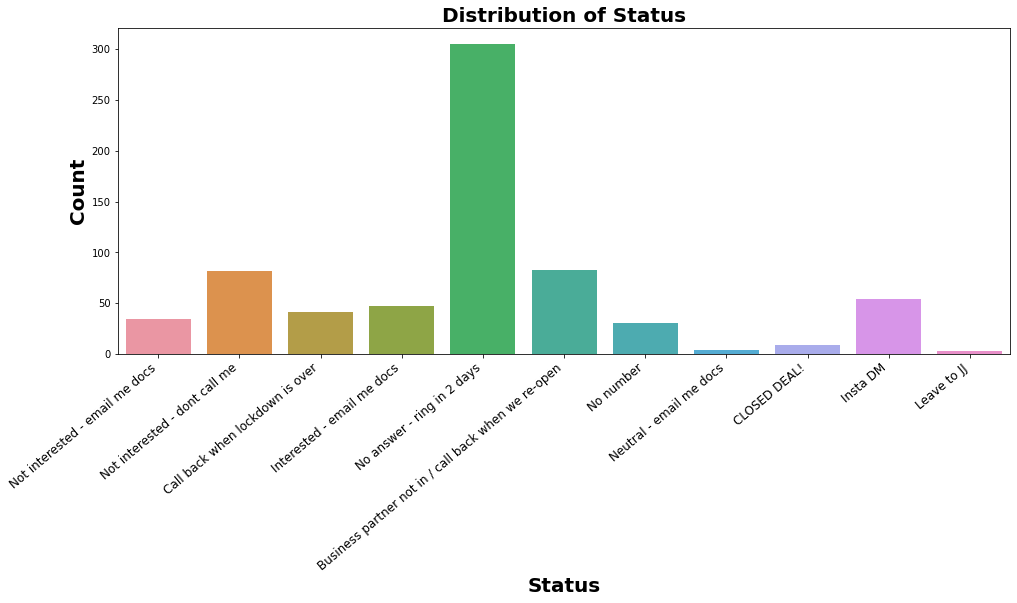

In [23]:
# small visulation of distribution of the 'Status' column
plt.figure(figsize=(16,6))
ax = sns.countplot(x=df2["Status"], data=df2.iloc[:,:8],)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plt.title('Distribution of Status', fontsize=20, fontweight='bold')
plt.ylabel('Count', fontsize=20, fontweight='bold')
plt.xlabel('Status', fontsize=20, fontweight='bold')
plt.show()

# The Encoding Step

After this step we use some label encoding techniques



 
## Before starting of any kind of encoding
 we use "manuel ordinal encoding technique" for the 'Status' column
 
 in order to have more meaningful 'Status' column we sort the values wtih our 'opinion' importance order
 which briefly goes like that

 "CLOSED DEAL!" means we got the job, it must be highest point
 "Interested - email me docs" means we are likely to make a deal with them, it must be over average point,9
 
 "Not interested - dont call me" means we lost the potential customer and 
 we are unlikely to make a deal with them, it must be the lowest point,0

In [24]:
def func_1(i):
    if i == "CLOSED DEAL!":
        return (int(10))
    elif i == "Insta DM" :
        return (int(9))
    elif i == "Interested - email me docs" :
        return (int(8))
    elif i == "Neutral - email me docs":
        return (int(7))
    elif i == "Call back when lockdown is over":
        return (int(6))
    elif i == "Business partner not in / call back when we re-open" :
        return (int(5))
    elif i == "Leave to JJ":
        return (int(4))
    elif i == "No answer - ring in 2 days":
        return (int(3))
    elif i == "No number":
        return (int(2))
    elif i ==  "Not interested - email me docs":
        return (int(1))
    elif i == "Not interested - dont call me":
        return (int(0))
    else:               #we`d have used the elif contidition just above however,if we encounter with any outliers 
        return (int(0))

In [25]:
df2["Status_dummy"] = df2["Status"].copy(deep=True)
df2["Status_dummy"] = df2["Status_dummy"].apply(func_1)
df2

,Location,BETA AIM,Focus Area/Brand?,Initial Target Market,Cuisine,E-book sent?,am-pm,duration-call,Status,Status_dummy
0,Balham,No,Yes,Yes,Brunch,Yes,PM,1-5 min,Not interested - email me docs,1
1,Balham,No,Yes,Yes,Brunch,Yes,AM,1-5 min,Not interested - dont call me,0
2,Balham,No,Yes,No,Coffee,No,PM,0 min,Call back when lockdown is over,6
3,Balham,No,Yes,Yes,Brunch,No,PM,1-5 min,Not interested - email me docs,1
4,Balham,No,Yes,No,Turkish,No,PM,1 min,Interested - email me docs,8
...,...,...,...,...,...,...,...,...,...,...
690,St James,Yes,Yes,Yes,Italian,No,PM,0 min,No answer - ring in 2 days,3
691,St James,Yes,Yes,No,Cafe,No,PM,1 min,No answer - ring in 2 days,3
692,St James,Yes,Yes,Yes,Coffee,No,PM,5-10 min,Not interested - dont call me,0
693,St James,No,Yes,Yes,Sandwiches,No,PM,0 min,No answer - ring in 2 days,3


In [26]:
# to show more understandable encoded dataframe
df2.sort_values(by='Status_dummy',ascending = False)

,Location,BETA AIM,Focus Area/Brand?,Initial Target Market,Cuisine,E-book sent?,am-pm,duration-call,Status,Status_dummy
694,Banstead,Yes,Yes,Yes,Healthy Cafe,No,PM,1-5 min,CLOSED DEAL!,10
164,Epsom,Yes,Yes,No,British,Yes,AM,5-10 min,CLOSED DEAL!,10
32,Cheam,Yes,Yes,No,Cafe / Desert,Yes,PM,0 min,CLOSED DEAL!,10
669,Pimlico,Yes,Yes,No,Thai,No,PM,5-10 min,CLOSED DEAL!,10
590,West Kensington,Yes,Yes,Yes,Vegan,No,PM,1-5 min,CLOSED DEAL!,10
...,...,...,...,...,...,...,...,...,...,...
223,Hammersmith,Yes,Yes,Yes,Healthy Cafe,No,PM,1 min,Not interested - dont call me,0
94,Clapham,Yes,Yes,No,Thai,No,AM,1-5 min,Not interested - dont call me,0
214,Fulham,No,Yes,No,Cafe,Yes,AM,0 min,Not interested - dont call me,0
104,Cobham,No,Yes,No,Desert,No,PM,1 min,Not interested - dont call me,0


In [27]:
df3 = df2.copy(deep= True)
df3.head(2)

,Location,BETA AIM,Focus Area/Brand?,Initial Target Market,Cuisine,E-book sent?,am-pm,duration-call,Status,Status_dummy
0,Balham,No,Yes,Yes,Brunch,Yes,PM,1-5 min,Not interested - email me docs,1
1,Balham,No,Yes,Yes,Brunch,Yes,AM,1-5 min,Not interested - dont call me,0


In [28]:
df3["Cuisine"][df3["Cuisine"].str.contains('Cafe')].unique()

array(['Cafe', 'Healthy Cafe', 'Cafe / Desert', 'Portugese Cafe'],
      dtype=object)

In [29]:
df3["Cuisine"].nunique()

74

### a small tunning process to reduce number of classes in the 'Cuisine' feature

In [30]:
df3["Cuisine"]  = df3["Cuisine"].apply(lambda x: 'Cafe' if 'Cafe' in x else x )
df3["Cuisine"]  = df3["Cuisine"].apply(lambda x: 'Cafe' if 'Café' in x else x )
df3["Cuisine"]  = df3["Cuisine"].apply(lambda x: 'Kebab' if 'Kebab' in x else x )
df3["Cuisine"] = df3["Cuisine"].str.replace('Fried Chicken ','Fried Chicken')
df3["Cuisine"]  = df3["Cuisine"].apply(lambda x: 'European' if 'European' in x else x )
df3["Cuisine"]  = df3["Cuisine"].apply(lambda x: 'Juice' if 'Juice' in x else x )
df3["Cuisine"].nunique()

65

In [31]:
x = df3.iloc[:,:8].copy(deep=True) 
#x.info()

y = df3["Status_dummy"].copy(deep=True) 
#y

train_1=pd.DataFrame()
label=LabelEncoder()

for c in  x.columns:
    if(x[c].dtype=='object'):
        train_1[c]=label.fit_transform(x[c])
    else:
        train_1[c]=x[c]

#train_1["Status_dummy"] = y.copy(deep=True) to later use "maybe"
train_1 

,Location,BETA AIM,Focus Area/Brand?,Initial Target Market,Cuisine,E-book sent?,am-pm,duration-call
0,0,0,1,1,8,1,1,2
1,0,0,1,1,8,1,0,2
2,0,0,1,0,14,0,1,0
3,0,0,1,1,8,0,1,2
4,0,0,1,0,59,0,1,1
...,...,...,...,...,...,...,...,...
690,36,1,1,1,27,0,1,0
691,36,1,1,0,10,0,1,1
692,36,1,1,1,14,0,1,3
693,36,0,1,1,47,0,1,0


In [32]:
print('train_1 data set has got {} rows and {} columns'.format(train_1.shape[0],train_1.shape[1]))

train_1 data set has got 695 rows and 8 columns


# The Feature Extraction Step


--- After this step we use feature extraction techniques

In [33]:
model = ExtraTreesClassifier()
model.fit(train_1,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.31903286 0.03406704 0.0186828  0.03118532 0.34089321 0.03676478
 0.02732294 0.19205104]


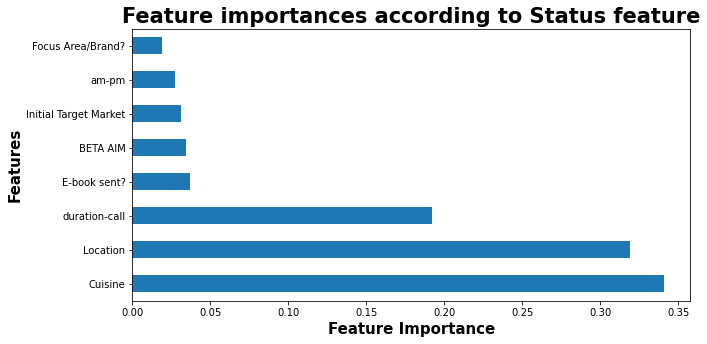

In [34]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train_1.columns)
feat_importances.nlargest(10).plot(kind='barh',figsize=(10,5))
plt.title('Feature importances according to Status feature', fontsize=21, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=15, fontweight='bold')
plt.ylabel('Features', fontsize=15, fontweight='bold')
plt.show()

In [35]:
# As can be clearly seeable from the feature importance plot above, we must extract only top 3 features for our work
train_2 = train_1[["Location","Cuisine","duration-call"]].copy(deep=True)
#train_2

In [36]:
#After the extraction , we try Extra Trees Classifier technique again 
model = ExtraTreesClassifier()
model.fit(train_2,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.40615643 0.39163972 0.20220385]


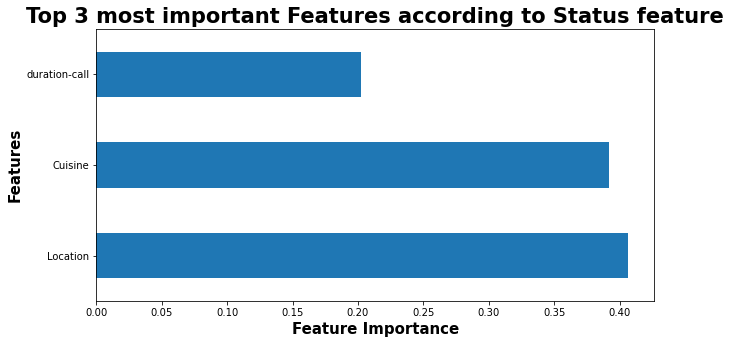

In [37]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train_2.columns)
feat_importances.nlargest(10).plot(kind='barh',figsize=(10,5))
plt.title('Top 3 most important Features according to Status feature', fontsize=21, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=15,fontweight='bold')
plt.ylabel('Features', fontsize=15, fontweight='bold')
plt.show()

In [38]:
#now, we can drop the unneeded columns out
df3=df3.drop(['BETA AIM','Focus Area/Brand?','Initial Target Market','E-book sent?','am-pm'], axis = 1) 
df3.head()

,Location,Cuisine,duration-call,Status,Status_dummy
0,Balham,Brunch,1-5 min,Not interested - email me docs,1
1,Balham,Brunch,1-5 min,Not interested - dont call me,0
2,Balham,Coffee,0 min,Call back when lockdown is over,6
3,Balham,Brunch,1-5 min,Not interested - email me docs,1
4,Balham,Turkish,1 min,Interested - email me docs,8


In [39]:
df3.groupby('Location').agg({'Status_dummy': {lambda x: x.nlargest(10).sum() }}).head()

,Status_dummy
,<lambda>
Location,
Balham,26
Banstead,42
Battersea,58
Cheam,54
Clapham,83


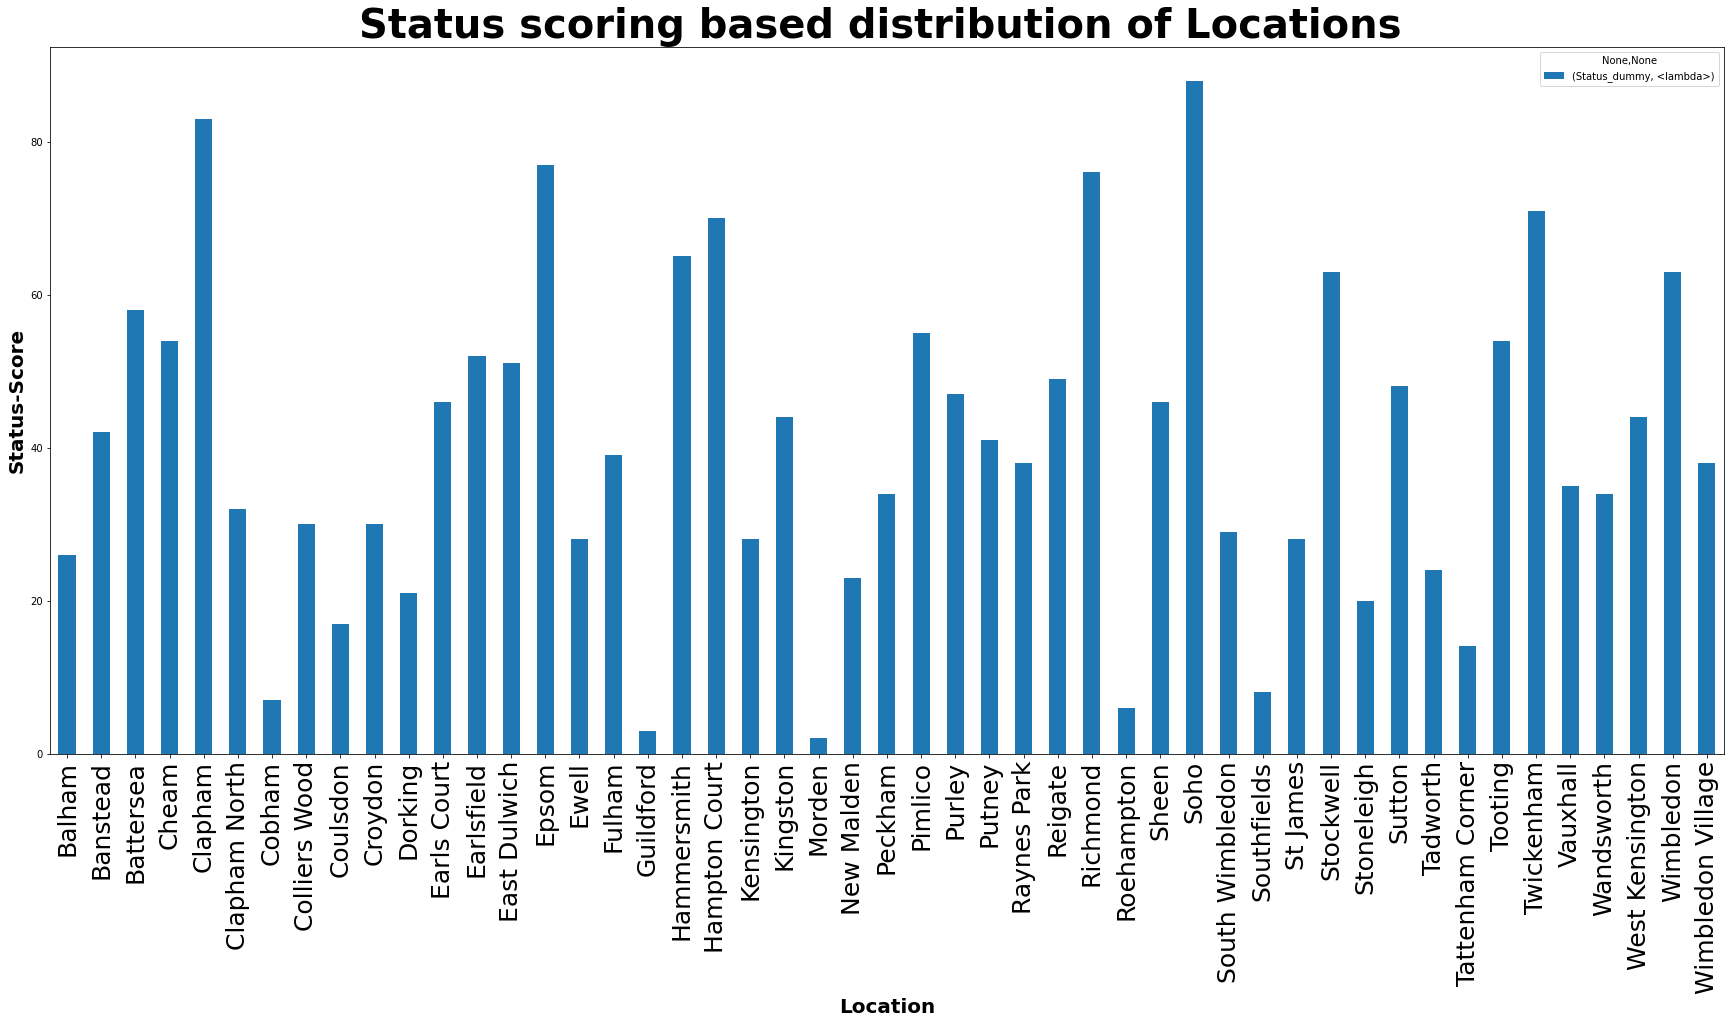

In [40]:
#an illustration of Status scoring based distribution of Locations
df3.groupby('Location').agg({'Status_dummy': {lambda x: x.nlargest(10).sum() }}).plot(kind='bar',figsize=(30,13))
plt.xticks(rotation=90,fontsize=25)
plt.title('Status scoring based distribution of Locations ', fontsize=40, fontweight='bold')
plt.ylabel('Status-Score', fontsize=20, fontweight='bold')
plt.xlabel('Location', fontsize=20, fontweight='bold')
plt.show()

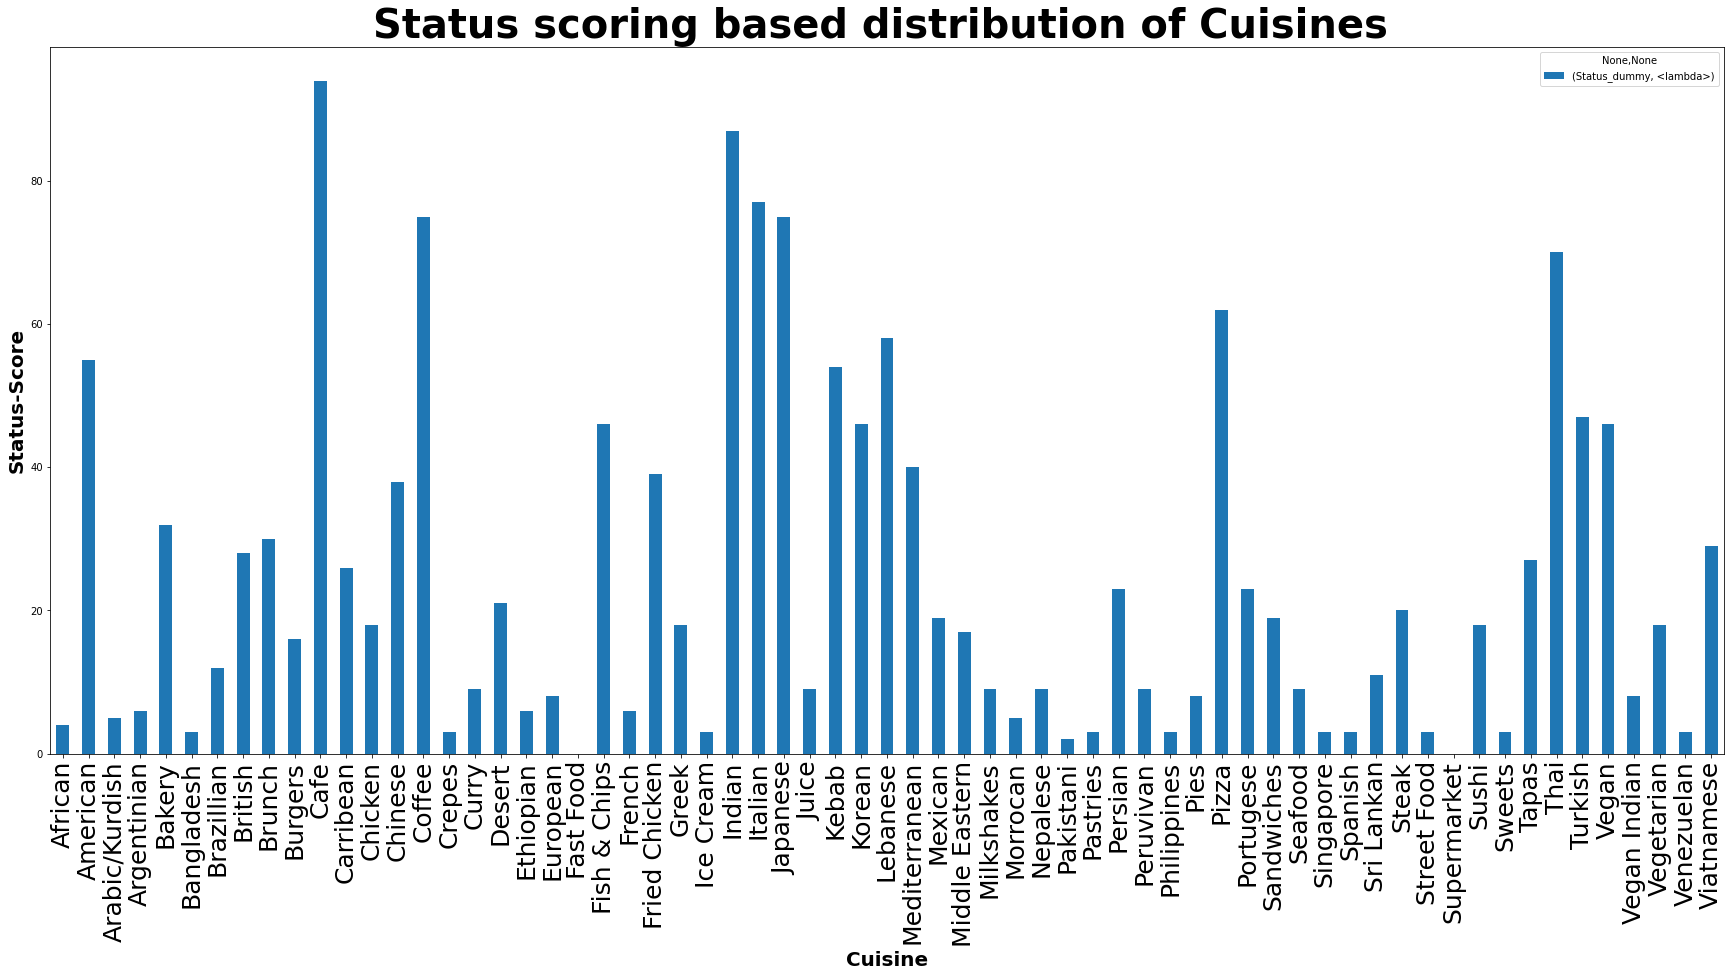

In [41]:
#an illustration of Status scoring based distribution of Cuisines
df3.groupby('Cuisine').agg({'Status_dummy': {lambda x: x.nlargest(10).sum() }}).plot(kind='bar',figsize=(30,13))
plt.xticks(rotation=90,fontsize=25)
plt.title('Status scoring based distribution of Cuisines ', fontsize=40, fontweight='bold')
plt.ylabel('Status-Score', fontsize=20, fontweight='bold')
plt.xlabel('Cuisine', fontsize=20, fontweight='bold')
plt.show()

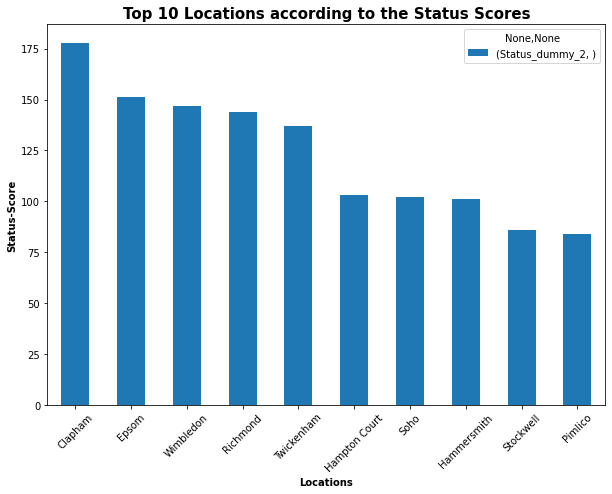

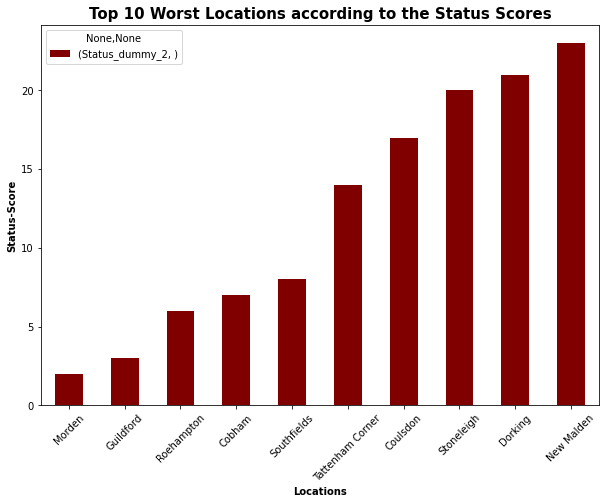

In [42]:
#the illustrations of Status scoring based top 10 Locations
df_location_1=df3.groupby('Location').agg({'Status_dummy': {lambda x: x.nlargest(100).sum() }}).copy(deep=True)
df_location_1['Status_dummy_2'] = df_location_1['Status_dummy']
df_location_1.drop('Status_dummy', axis=1, inplace=True)
df_location_1.nlargest(10,'Status_dummy_2').plot(kind='bar',figsize=(10,7))
plt.xticks(rotation=45,fontsize=10)
plt.title('Top 10 Locations according to the Status Scores', fontsize=15, fontweight='bold')
plt.ylabel('Status-Score', fontsize=10, fontweight='bold')
plt.xlabel('Locations', fontsize=10, fontweight='bold')

df_location_2=df3.groupby('Location').agg({'Status_dummy': {lambda x: x.nsmallest(100).sum() }}).copy(deep=True)
df_location_2['Status_dummy_2'] = df_location_2['Status_dummy']
df_location_2.drop('Status_dummy', axis=1, inplace=True)
df_location_2.nsmallest(10,'Status_dummy_2').plot(kind='bar',figsize=(10,7),color='maroon')
plt.xticks(rotation=45,fontsize=10)
plt.title('Top 10 Worst Locations according to the Status Scores', fontsize=15, fontweight='bold')
plt.ylabel('Status-Score', fontsize=10, fontweight='bold')
plt.xlabel('Locations', fontsize=10, fontweight='bold')


plt.show()

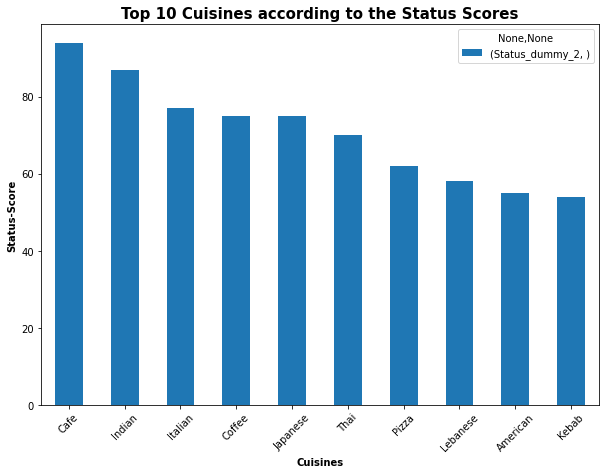

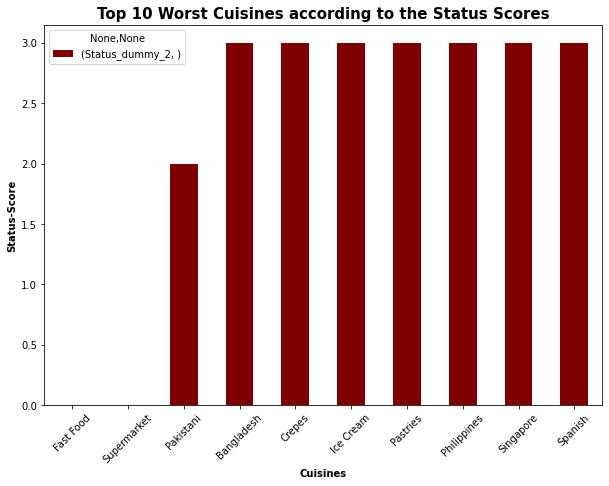

In [43]:
#the illustrations of Status scoring based top 10 Cuisines
df_Cuisine_1=df3.groupby('Cuisine').agg({'Status_dummy': {lambda x: x.nlargest(10).sum() }}).copy(deep=True)
df_Cuisine_1['Status_dummy_2'] = df_Cuisine_1['Status_dummy']
df_Cuisine_1.drop('Status_dummy', axis=1, inplace=True)
df_Cuisine_1.nlargest(10,'Status_dummy_2').plot(kind='bar',figsize=(10,7))
plt.xticks(rotation=45,fontsize=10)
plt.title('Top 10 Cuisines according to the Status Scores', fontsize=15, fontweight='bold')
plt.ylabel('Status-Score', fontsize=10, fontweight='bold')
plt.xlabel('Cuisines', fontsize=10, fontweight='bold')


df_Cuisine_2=df3.groupby('Cuisine').agg({'Status_dummy': {lambda x: x.nlargest(10).sum() }}).copy(deep=True)
df_Cuisine_2['Status_dummy_2'] = df_Cuisine_2['Status_dummy']
df_Cuisine_2.drop('Status_dummy', axis=1, inplace=True)
df_Cuisine_2.nsmallest(10,'Status_dummy_2').plot(kind='bar',figsize=(10,7),color='maroon')
plt.xticks(rotation=45,fontsize=10)
plt.title('Top 10 Worst Cuisines according to the Status Scores', fontsize=15, fontweight='bold')
plt.ylabel('Status-Score', fontsize=10, fontweight='bold')
plt.xlabel('Cuisines', fontsize=10, fontweight='bold')


plt.show()